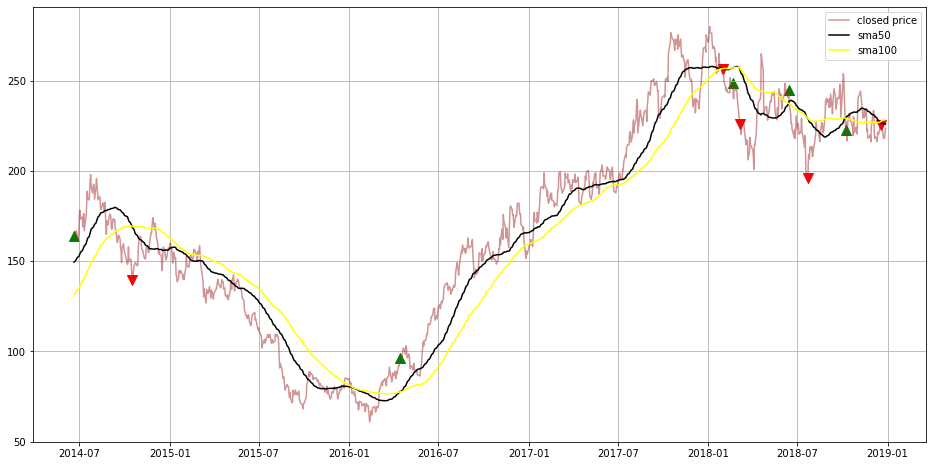

In [1]:
import mysql.connector as connection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import great_expectations as ge
import datetime as datetime
try:
    mydb = connection.connect(host="localhost", database = 'assessment',user="root", passwd="olorun96",use_pure=True)
    query = "Select * from hindalco_1d;"
    df = pd.read_sql(query,mydb)
    mydb.close()
except Exception as e:
    mydb.close()
    print(str(e))
df = df.set_index(pd.DatetimeIndex(df["datetime"].values))
df['sma50'] = df['close'].rolling(50).mean()
df['sma100'] = df['close'].rolling(100).mean()
df = df.dropna()
Buy = []
Sell = []
for i in range(len(df)):
    if df.sma50.iloc[i] > df.sma100.iloc[i] and df.sma50.iloc[i-1] < df.sma100.iloc[i-1]:
        Buy.append(i)
    elif df.sma50.iloc[i] < df.sma100.iloc[i] and df.sma50.iloc[i-1] > df.sma100.iloc[i-1]:
        Sell.append(i)
plt.figure(figsize=(16,8))
plt.plot(df['close'], label = 'closed price', c = 'brown', alpha = 0.5)
plt.plot(df['sma50'], label  = 'sma50', c = 'black', alpha = 1)
plt.plot(df['sma100'], label  = 'sma100', c = 'yellow', alpha = 1)
plt.scatter(df.iloc[Buy].index, df.iloc[Buy]['close'], marker='^', color='green', s=100)
plt.scatter(df.iloc[Sell].index, df.iloc[Sell]['close'], marker='v', color='red', s=100)
plt.legend()
plt.grid()
plt.show()

In [2]:
gdf = ge.from_pandas(df)

In [3]:
gdf.expect_column_values_to_be_in_type_list('close',['float'])

{
  "success": true,
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "result": {
    "observed_value": "float64"
  },
  "meta": {}
}

In [4]:
gdf.expect_column_values_to_be_in_type_list('high',['float'])

{
  "success": true,
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "result": {
    "observed_value": "float64"
  },
  "meta": {}
}

In [5]:
gdf.expect_column_values_to_be_in_type_list('open',['float'])

{
  "success": true,
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "result": {
    "observed_value": "float64"
  },
  "meta": {}
}

In [6]:
gdf.expect_column_values_to_be_in_type_list('low',['float'])

{
  "success": true,
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "result": {
    "observed_value": "float64"
  },
  "meta": {}
}

In [7]:
gdf.expect_column_values_to_be_in_type_list('volume',['int64'])

{
  "success": true,
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "result": {
    "observed_value": "int64"
  },
  "meta": {}
}

In [8]:
gdf.expect_column_values_to_be_in_type_list('instrument',['str'])

{
  "success": true,
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "result": {
    "element_count": 1116,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {}
}

In [9]:
gdf.expect_column_values_to_be_in_type_list('datetime',['datetime64'])

{
  "success": true,
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "result": {
    "observed_value": "datetime64"
  },
  "meta": {}
}